### Student Test Score Prediction
--Kaggle

This notebook is for the playground competition in kaggle

The required installations:
1. pip install kaggle

In [ ]:
import zipfile
from pathlib import Path

zip_path = Path(r"C:\Users\sriku\Desktop\projects\Student_Scores\playground-series-s6e1.zip")
extract_to = Path(r"./")

extract_to.mkdir(exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzip complete")


Unzip complete


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
train_df=pd.read_csv('train.csv',index_col='id')
test_df=pd.read_csv('test.csv',index_col='id')

In [3]:
train_df

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599


In [4]:
len(train_df),len(test_df)

(630000, 270000)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               630000 non-null  int64  
 1   gender            630000 non-null  object 
 2   course            630000 non-null  object 
 3   study_hours       630000 non-null  float64
 4   class_attendance  630000 non-null  float64
 5   internet_access   630000 non-null  object 
 6   sleep_hours       630000 non-null  float64
 7   sleep_quality     630000 non-null  object 
 8   study_method      630000 non-null  object 
 9   facility_rating   630000 non-null  object 
 10  exam_difficulty   630000 non-null  object 
 11  exam_score        630000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 62.5+ MB


In [6]:
train_df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,20.545821,4.002337,71.987261,7.072758,62.506672
std,2.260238,2.359880,17.430098,1.744811,18.916884
min,17.000000,0.080000,40.600000,4.100000,19.599000
25%,19.000000,1.970000,57.000000,5.600000,48.800000
50%,21.000000,4.000000,72.600000,7.100000,62.600000
75%,23.000000,6.050000,87.200000,8.600000,76.300000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [7]:
train_df.isnull().sum()

,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0
facility_rating,0


(array([73188., 75632., 78885.,     0., 80742., 86620.,     0., 74950.,
        82872., 77111.]),
 array([17. , 17.7, 18.4, 19.1, 19.8, 20.5, 21.2, 21.9, 22.6, 23.3, 24. ]),
 <BarContainer object of 10 artists>)

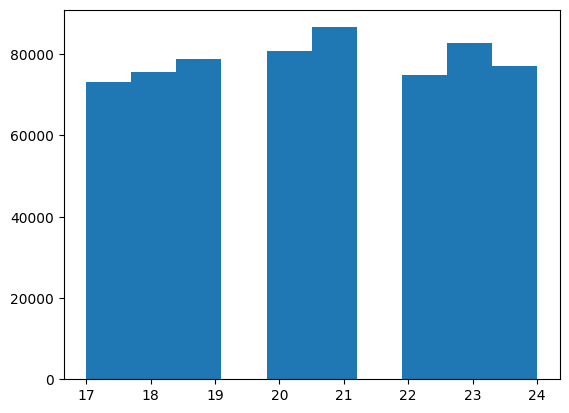

In [8]:
plt.hist(train_df.age)

In [9]:
train_df.gender.value_counts()

,count
gender,
other,211097
male,210593
female,208310


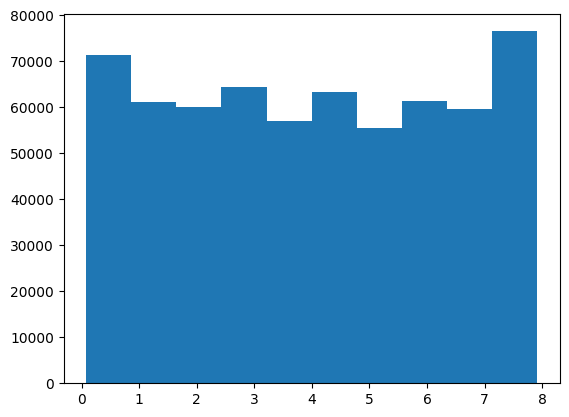

In [10]:
plt.hist(train_df.study_hours);

(array([64581., 60295., 61636., 65115., 47027., 64271., 60418., 63783.,
        67595., 75279.]),
 array([4.1 , 4.68, 5.26, 5.84, 6.42, 7.  , 7.58, 8.16, 8.74, 9.32, 9.9 ]),
 <BarContainer object of 10 artists>)

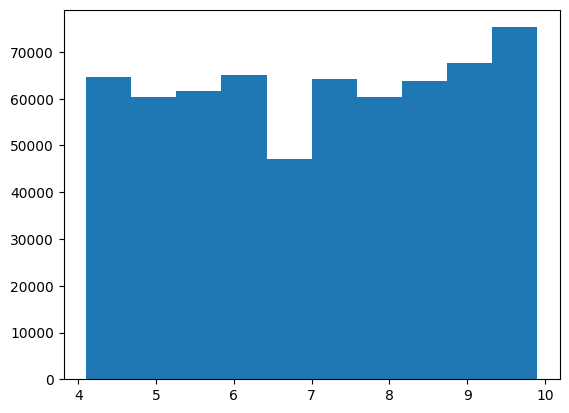

In [11]:
plt.hist(train_df.sleep_hours)

In [12]:
train_df.study_method.value_counts()

,count
study_method,
coaching,131697
self-study,131131
mixed,123086
group study,123009
online videos,121077


In [13]:
train_df.exam_difficulty.value_counts()
# exam score vastly depends on the toughness of the exam, this is factual and lets see what the data holds for us: hypothesis testing

,count
exam_difficulty,
moderate,353982
easy,176540
hard,99478


In [14]:
train_df.internet_access.value_counts()
# covariance with marks scored has to be testing to get to conclusions.

,count
internet_access,
yes,579423
no,50577


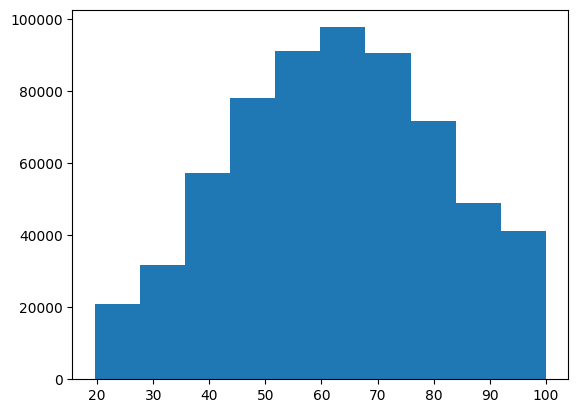

In [15]:
plt.hist(train_df.exam_score);

A nice normal distribution skewed towards right, rightfully so, could mean two things, either students are competent or the exam difficulty is mostly easy to medium -> which is the first impression.

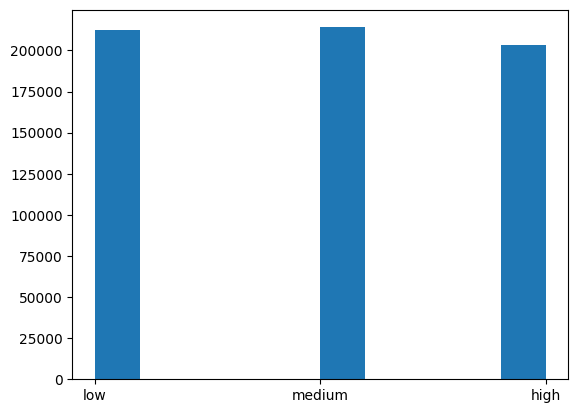

In [16]:
plt.hist(train_df.facility_rating);

In [17]:
train_df.course.value_counts()

,count
course,
b.tech,131236
b.sc,111554
b.com,110932
bca,88721
bba,75644
ba,61989
diploma,49924


# Regression Problem

1. Feature engineering - numerical and categorical
2. model selection, increment- exploring all state of the art, from linear, polynomial, randomforest, catboost, neural networks

In [4]:
# feature engineering
dummies=train_df.select_dtypes(object).columns
dummies

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [5]:
df_encoded=pd.get_dummies(train_df,columns=dummies).astype(int)
df_encoded

,age,study_hours,class_attendance,sleep_hours,exam_score,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,sleep_quality_average,sleep_quality_good,sleep_quality_poor,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21,7,98,4,78,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1,18,4,94,4,46,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,20,4,92,5,99,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,19,2,49,8,63,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,23,7,86,9,100,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,4,69,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
629996,21,7,54,4,78,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
629997,24,0,44,4,19,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [6]:
df_encoded.columns

Index(['age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score',
       'gender_female', 'gender_male', 'gender_other', 'course_b.com',
       'course_b.sc', 'course_b.tech', 'course_ba', 'course_bba', 'course_bca',
       'course_diploma', 'internet_access_no', 'internet_access_yes',
       'sleep_quality_average', 'sleep_quality_good', 'sleep_quality_poor',
       'study_method_coaching', 'study_method_group study',
       'study_method_mixed', 'study_method_online videos',
       'study_method_self-study', 'facility_rating_high',
       'facility_rating_low', 'facility_rating_medium', 'exam_difficulty_easy',
       'exam_difficulty_hard', 'exam_difficulty_moderate'],
      dtype='object')

In [7]:
y=df_encoded.exam_score
df_encoded.drop(columns=["exam_score"],inplace=True)

In [8]:
df_encoded

,age,study_hours,class_attendance,sleep_hours,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,course_bca,course_diploma,internet_access_no,internet_access_yes,sleep_quality_average,sleep_quality_good,sleep_quality_poor,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_high,facility_rating_low,facility_rating_medium,exam_difficulty_easy,exam_difficulty_hard,exam_difficulty_moderate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21,7,98,4,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1,18,4,94,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,20,4,92,5,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1
3,19,2,49,8,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,23,7,86,9,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,18,4,70,4,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
629996,21,7,54,4,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1
629997,24,0,44,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [9]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
# it has to be grid search given the internal Crossvalidation that it performs, returns the best model with hyperparameters

In [24]:
linRegressor=LinearRegression()

In [25]:
params={
    "positive":[True,False]
}

In [26]:
grid=GridSearchCV(
    estimator=linRegressor,
    param_grid=params,
    cv=5,
    scoring=None,
    n_jobs=-1
)
grid.fit(df_encoded,y)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'positive': [True, False]})

In [27]:
linRegressor=grid.best_estimator_

In [28]:
linRegressor.fit(df_encoded,y)

LinearRegression()

In [29]:
linRegressor.score(df_encoded,y)

0.7722986954037258

##### Model 2: Polynomail regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [17]:
pipe=Pipeline([
    ("scaler",StandardScaler()),
    ("polyFeat",PolynomialFeatures(degree=2)),
    ("lr",LinearRegression())
])

In [12]:
params={
    "polyFeat__degree":[1,6],
    "polyFeat__include_bias":[False],
    "lr__fit_intercept":[True,False]
}

In [14]:
grid=RandomizedSearchCV(
    pipe,
    params,
    cv=3,
    scoring=None,
    n_jobs=-1,
    n_iter=2
)
grid.fit(df_encoded,y)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}
Detailed tracebacks of the workers should have been printed to stderr in the executor process if faulthandler was not disabled.

In [ ]:
polynomial_regressor=grid.best_estimator_

In [18]:
polynomial_regressor=pipe

In [19]:
polynomial_regressor.fit(df_encoded,y)
polynomial_regressor.score(df_encoded,y)

0.7729165359444641

##### Model 3: RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [36]:
rfRegressor=RandomForestRegressor()

In [37]:
params={
    "n_estimators":[50,80],
    "max_depth":[None,10,20,30],
}

In [38]:
rfRegressor.fit(df_encoded,y)

RandomForestRegressor()

In [39]:
rfRegressor.score(df_encoded,y)

0.9639429161441935

In [21]:
root_mean_squared_error(y,rfRegressor.predict(df_encoded))

3.597408181914166

##### Model 4: Gradient Boosting Regressor

Check out sklearn's gradient booster

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
reg=GradientBoostingRegressor()
model=Pipeline([
    ("scaler",StandardScaler()),
    ("reg",reg)]
)

In [24]:
model.fit(df_encoded,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('reg', GradientBoostingRegressor())])

In [25]:
model.score(df_encoded,y)

0.7735417211257661

#####Data insights for model selection

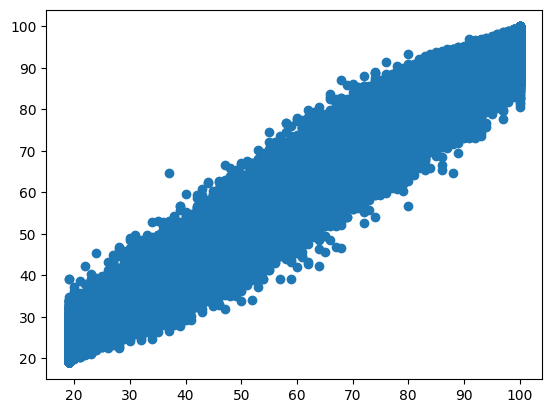

In [40]:
plt.scatter(y,rfRegressor.predict(df_encoded))

In [43]:
train_df_oneHot=pd.get_dummies(train_df,columns=dummies).astype(int)

In [47]:
train_df_oneHot.corr().exam_score.sort_values(ascending=False)

,exam_score
exam_score,1.000000
study_hours,0.757081
class_attendance,0.361271
sleep_quality_good,0.203306
study_method_coaching,0.183951
sleep_hours,0.163635
facility_rating_high,0.153527
study_method_mixed,0.067722
facility_rating_medium,0.019968
course_bba,0.013817


In [48]:
train_df_oneHot.drop(columns=["exam_score"],inplace=True)

##### Neural Network model

In [49]:
import tensorflow as tf

In [50]:
input_layer=tf.keras.layers.Input(shape=(train_df_oneHot.shape[1],))
x=tf.keras.layers.Dense(100,activation="relu")(input_layer)
output_layer=tf.keras.layers.Dense(1,activation="linear")(x)

nn_model=tf.keras.Model(inputs=input_layer,outputs=output_layer)

In [53]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [54]:
callbacks_list=[
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="loss",
        factor=0.1,
        patience=1,
        verbose=1,
        mode="auto",
        min_delta=0.0001
    )
]

In [55]:
nn_model.fit(train_df_oneHot,y,epochs=10,batch_size=32,verbose=1,callbacks=callbacks_list)

Epoch 1/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - loss: 85.2491 - root_mean_squared_error: 9.2328 - learning_rate: 0.0100
Epoch 2/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 82.9339 - root_mean_squared_error: 9.1068 - learning_rate: 0.0100
Epoch 3/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 82.7881 - root_mean_squared_error: 9.0988 - learning_rate: 0.0100
Epoch 4/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 82.8971 - root_mean_squared_error: 9.1047 - learning_rate: 0.0100
Epoch 5/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 82.9512 - root_mean_squared_error: 9.1077 - learning_rate: 0.0100
Epoch 6/10
19664/19688 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 82.9238 - root_mean_squared_error: 9.1062
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
19688/19688 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 82.9238 - root_mean_squared_error: 9.1062 - learning_rate: 0.0100
Epoch 7/10
19688/19688 ━━━━━━━━━━━━━━━━━━━━